In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

In [2]:
# Function that gets the values from the World Bank
def get_deaths_per_million_DGP_WBApi():
    # Create the endpoint for API request
    endpoint = "http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json"
    # Get the initial data in the first request (paged request)
    response = requests.get(endpoint).json()
    # Get the total number of registers to get all the data in the data set
    total_registers = response[0]["total"]
    # Make the request to include all data
    endpoint = f"http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json&per_page={total_registers}"
    response = requests.get(endpoint).json()
    # Get the Data only
    data_df = pd.DataFrame(response[1])

    # Create final DataFrame with the required columns
    new = pd.DataFrame()
    new["country"] = ""
    new["countryiso3code"] = ""
    new["date"] = ""
    new["value"] = ""
    new["indicator"] = ""
    new["description"] = ""

    # From the World Bank Data, just extract the needed one
    for idx, row in data_df.iterrows():
        # Add each row to the final DataFrame
        new.loc[idx,"country"] = dict(row["country"])["value"]
        new.loc[idx,"countryiso3code"] = row["countryiso3code"]
        new.loc[idx,"date"] = row["date"]
        new.loc[idx,"value"] = row["value"]
        new.loc[idx,"indicator"] = dict(row["indicator"])["id"]
        new.loc[idx,"description"] = dict(row["indicator"])["value"]

    # Return the DataFrame
    return new


In [3]:
# Call the funciton and store it in a variable to treat the data after
raw_data = get_deaths_per_million_DGP_WBApi()

In [4]:
# copy the data in case we need the raw data again
DpM_Mundo = raw_data.copy()

In [5]:
# Get the information from the World in General
test = DpM_Mundo["countryiso3code"] == "WLD"
DpM_Mundo = DpM_Mundo.loc[test]
# Clean the DataFrame
DpM_Mundo = DpM_Mundo.dropna(subset=['value'])
# Sort values by date ascending
DpM_Mundo = DpM_Mundo.sort_values(by=['date'], ascending=True)
DpM_Mundo.shape

(59, 6)

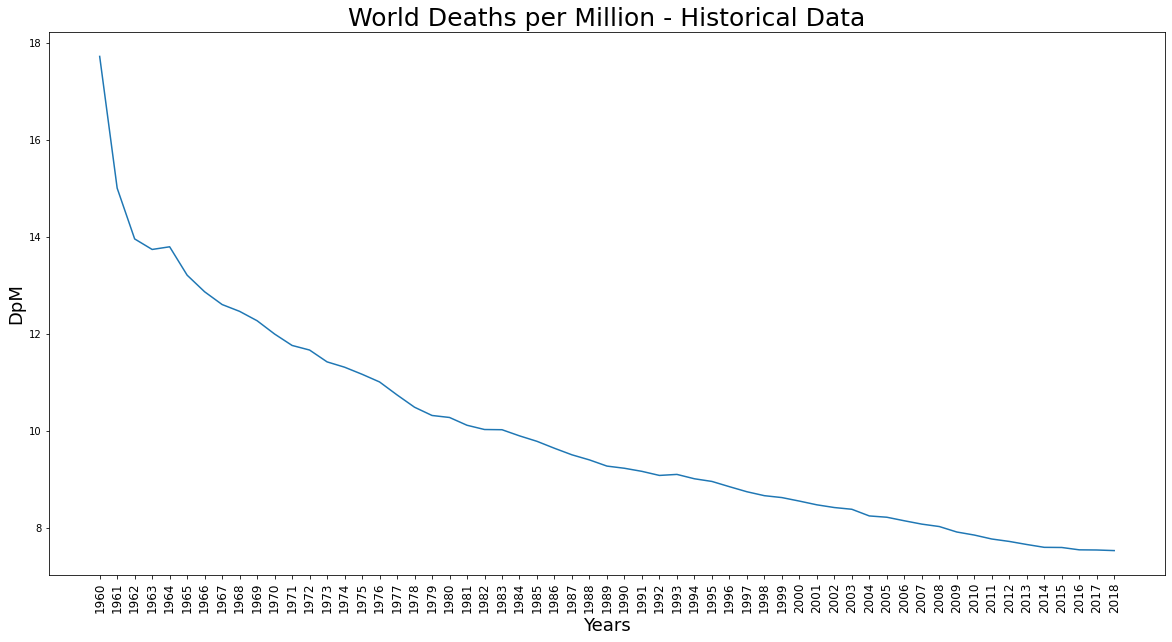

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(20,10))
plt.plot(DpM_Mundo["date"],DpM_Mundo["value"])
plt.title("World Deaths per Million - Historical Data",fontsize=25)
plt.xlabel("Years",fontsize=18)
plt.ylabel("DpM",fontsize=18)
plt.xticks(rotation="vertical",fontsize=12)
plt.show()
plt.savefig("Output/World_Deaths_per_Million_Historical_data.png")

In [7]:
def linear_regression(x,y,title,x_label,y_label):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.figure(figsize=(20,10))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title,fontsize=25)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.xticks(x,rotation="vertical",fontsize=12)
    plt.show()
    plt.savefig(f"Output/{title}.png")
    return slope,intercept

In [8]:
DpM_Mundo.head()

,country,countryiso3code,date,value,indicator,description
2866,World,WLD,1960,17.7145,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"
2865,World,WLD,1961,14.9992,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"
2864,World,WLD,1962,13.9526,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"
2863,World,WLD,1963,13.7356,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"
2862,World,WLD,1964,13.7905,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)"


In [9]:
DpM_Mundo.dtypes

country            object
countryiso3code    object
date               object
value              object
indicator          object
description        object
dtype: object

In [10]:
DpM_Mundo["date"]=DpM_Mundo["date"].astype(float)
DpM_Mundo["value"]=DpM_Mundo["value"].astype(float)

In [11]:
DpM_Mundo.dtypes

country             object
countryiso3code     object
date               float64
value              float64
indicator           object
description         object
dtype: object

In [12]:
DpM_Mundo_new=DpM_Mundo.loc[DpM_Mundo["date"]>=1980]

The r-squared is: 0.9875580798440812


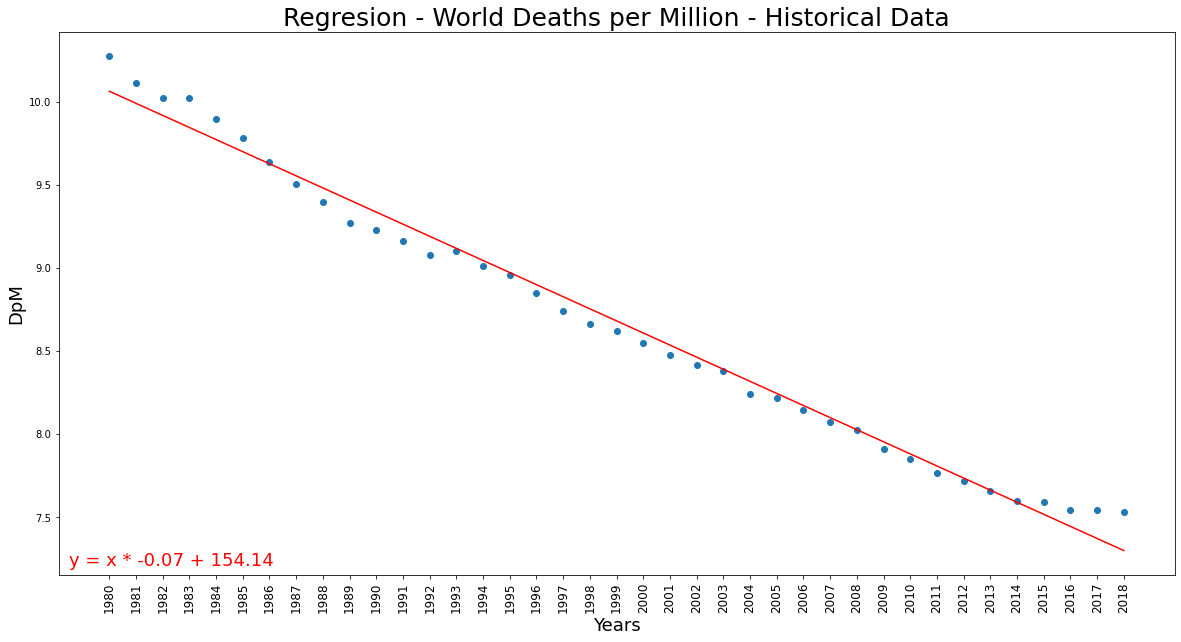

<Figure size 432x288 with 0 Axes>

In [13]:
m,b=linear_regression(DpM_Mundo_new["date"],DpM_Mundo_new["value"],"Regresion - World Deaths per Million - Historical Data","Years","DpM")

In [14]:
DpM_2020=2020*(m)+b
DpM_2021=2021*(m)+b
DpM_2022=2022*(m)+b
print(f"""The expected Deaths per Million Habitants in the World based on historical data is:
2020: {str(round(DpM_2020,2))} 
2021: {str(round(DpM_2021,2))} 
2022: {str(round(DpM_2022,2))}""")

The expected Deaths per Million Habitants in the World based on historical data is:
2020: 7.15 
2021: 7.08 
2022: 7.01


In [15]:
DpM_Historico=[DpM_2020,DpM_2021,DpM_2022]

In [16]:
T_DpM_Mundo=DpM_Mundo_new[["date","value"]]

In [17]:
T_DpM_Mundo.columns=["Año","DpM"]


In [18]:
T_DpM_Mundo

,Año,DpM
2846,1980.0,10.272459
2845,1981.0,10.112151
2844,1982.0,10.024429
2843,1983.0,10.020062
2842,1984.0,9.893736
2841,1985.0,9.780968
2840,1986.0,9.637619
2839,1987.0,9.502689
2838,1988.0,9.397761
2837,1989.0,9.270596


In [19]:
dataJF = "Resources/datos.csv"
dataJF = pd.read_csv(dataJF)

In [20]:
datos_df =pd.DataFrame(dataJF)

In [21]:
datos_df.head()

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC
0,1980,4458002944,11162,13348,2504,2994,2.08,1832600,612473,411,137
1,1981,4536996864,11442,14858,2522,3275,1.88,1894980,626403,418,138
2,1982,4617387008,11234,15808,2433,3424,0.48,1981357,640314,429,139
3,1983,4699569152,11531,16833,2454,3582,2.71,2016019,658986,429,140
4,1984,4784011776,11941,18200,2496,3804,4.53,2127095,687554,445,144


In [22]:
total_df=pd.merge(datos_df,T_DpM_Mundo,on="Año",how="left")
total_df=total_df.fillna(0)
total_df.head()

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC,DpM
0,1980,4458002944,11162,13348,2504,2994,2.08,1832600,612473,411,137,10.272459
1,1981,4536996864,11442,14858,2522,3275,1.88,1894980,626403,418,138,10.112151
2,1982,4617387008,11234,15808,2433,3424,0.48,1981357,640314,429,139,10.024429
3,1983,4699569152,11531,16833,2454,3582,2.71,2016019,658986,429,140,10.020062
4,1984,4784011776,11941,18200,2496,3804,4.53,2127095,687554,445,144,9.893736


In [23]:
total_df

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC,DpM
0,1980,4458002944,11162,13348,2504,2994,2.08,1832600,612473,411,137,10.272459
1,1981,4536996864,11442,14858,2522,3275,1.88,1894980,626403,418,138,10.112151
2,1982,4617387008,11234,15808,2433,3424,0.48,1981357,640314,429,139,10.024429
3,1983,4699569152,11531,16833,2454,3582,2.71,2016019,658986,429,140,10.020062
4,1984,4784011776,11941,18200,2496,3804,4.53,2127095,687554,445,144,9.893736
5,1985,4870922240,12471,19435,2560,3990,3.58,2168571,711442,445,146,9.780968
6,1986,4960567808,14698,20522,2963,4137,3.67,2212023,733122,446,148,9.637619
7,1987,5052521984,16921,21835,3349,4322,3.92,2253224,751677,446,149,9.502689
8,1988,5145425920,19031,23622,3699,4591,4.65,2276835,779388,442,151,9.397761
9,1989,5237441024,20019,25448,3822,4859,3.79,2353202,794771,449,152,9.270596


In [24]:
total_df.dtypes

Año                int64
Population         int64
GDPcons            int64
GDPConsPPP         int64
PC_GDPcons         int64
PC_GDPConsPPP      int64
Growth           float64
FOOD               int64
LIvestock          int64
FOOD_PC            int64
livestock_PC       int64
DpM              float64
dtype: object

In [25]:
total_dftot=total_df.loc[total_df["Año"]<=2018]

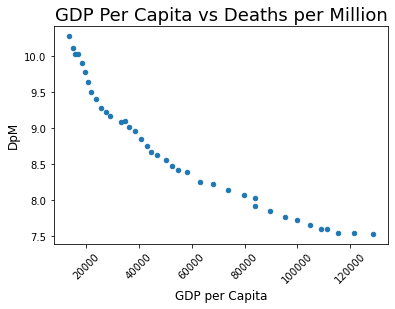

In [26]:
total_dftot.plot(kind="scatter",x="GDPConsPPP",y="DpM")
plt.title("GDP Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("GDP per Capita",fontsize=12)
plt.ylabel("DpM",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.savefig("Output/GDP_Per_Capita_vs_Deaths_per_Million.png")
plt.show()

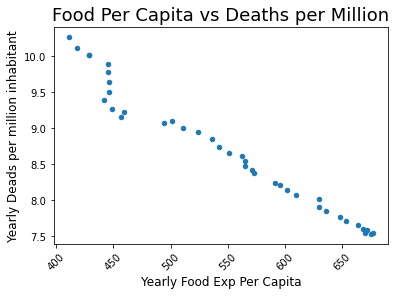

In [27]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="DpM")
plt.title("Food Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Deads per million inhabitant",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.savefig("Output/Food_Per_Capita_vs_Deaths_per_Million.png")
plt.show()

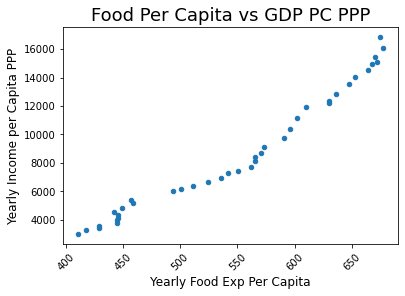

In [28]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="PC_GDPConsPPP")
plt.title("Food Per Capita vs GDP PC PPP",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Income per Capita PPP",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.savefig("Output/Food_Per_Capita_vs_GDP_PC_PPP.png")
plt.show()

In [29]:
total_df_ADJ=total_df.loc[(total_df["Año"]>=1996)&(total_df["Año"]<=2018)]

The r-squared is: 0.9674059861901594


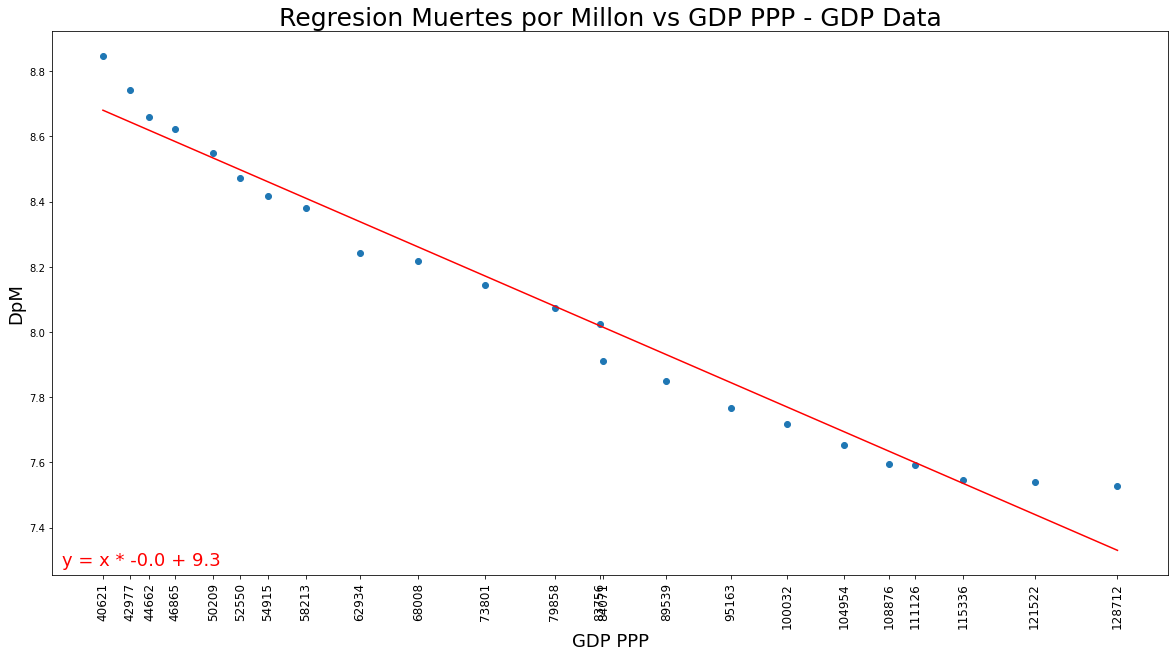

<Figure size 432x288 with 0 Axes>

In [30]:
s,a=linear_regression(total_df_ADJ["GDPConsPPP"],total_df_ADJ["DpM"],"Regresion Muertes por Millon vs GDP PPP - GDP Data","GDP PPP","DpM")

In [31]:
total_df_2020=total_df[total_df["Año"]==2020]
GDPconsPPP2020=total_df_2020["GDPConsPPP"].values

In [32]:
total_df_2021=total_df[total_df["Año"]==2021]
GDPconsPPP2021=total_df_2021["GDPConsPPP"].values

In [33]:
total_df_2022=total_df[total_df["Año"]==2022]
GDPconsPPP2022=total_df_2022["GDPConsPPP"].values

In [34]:
DpM_GDP_2020=GDPconsPPP2020*(s)+a
DpM_GDP_2021=GDPconsPPP2021*(s)+a
DpM_GDP_2022=GDPconsPPP2022*s+a
DpM_GDP=[DpM_GDP_2020,DpM_GDP_2021,DpM_GDP_2022]

In [35]:
print(f"""The expected Deaths per Million in the world using GDP Linear Regression is the next:
     2020: {round(DpM_GDP_2020[0],2)}
     2021: {round(DpM_GDP_2021[0],2)}
     2022: {round(DpM_GDP_2022[0],2)}""")

The expected Deaths per Million in the world using GDP Linear Regression is the next:
     2020: 7.31
     2021: 7.16
     2022: 7.03


In [36]:
[x[0] for x in DpM_GDP]

[7.3075778130583835, 7.15986222346085, 7.031352572824167]

In [37]:
output_data=pd.DataFrame({
    "Año":[2020,2021,2022],
    "DpM_Historico":[x[0] for x in DpM_GDP],
    "DpM_GDP":DpM_Historico
})

In [38]:
output_data["Delta"]=output_data["DpM_Historico"]-output_data["DpM_GDP"]

In [39]:
output_data["Muertes por Crisis"]=output_data["Delta"]*7700000

In [40]:
output_data["Muertes por Crisis"].sum()

2003280.701896776

In [41]:
output_data

,Año,DpM_Historico,DpM_GDP,Delta,Muertes por Crisis
0,2020,7.307578,7.152307,0.155271,1.195586e+06
1,2021,7.159862,7.079542,0.080320,6.184650e+05
2,2022,7.031353,7.006777,0.024575,1.892296e+05
